<a href="https://colab.research.google.com/github/anumit-web/Keras-tutorial-1/blob/main/Keras_test_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Keras
## Image Classification

In [ ]:
print("Hello, World!")

Hello, World!


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the CIFAR-10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the class labels to categorical labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
391/391 [==============================] - 71s 177ms/step - loss: 1.6777 - accuracy: 0.3870 - val_loss: 1.4065 - val_accuracy: 0.4918
Epoch 2/10
391/391 [==============================] - 71s 182ms/step - loss: 1.3178 - accuracy: 0.5286 - val_loss: 1.2359 - val_accuracy: 0.5561
Epoch 3/10
391/391 [==============================] - 69s 176ms/step - loss: 1.1550 - accuracy: 0.5898 - val_loss: 1.1483 - val_accuracy: 0.5920
Epoch 4/10
391/391 [==============================] - 68s 174ms/step - loss: 1.0393 - accuracy: 0.6339 - val_loss: 1.0313 - val_accuracy: 0.6446
Epoch 5/10
391/391 [==============================] - 67s 171ms/step - loss: 0.9586 - accuracy: 0.6636 - val_loss: 1.0075 - val_accuracy: 0.6437
Epoch 6/10
391/391 [==============================] - 69s 176ms/step - loss: 0.8872 - accuracy: 0.6904 - val_loss: 1.0037 - val_accuracy: 0.6467
Epoch 7/10
391/391 [==============================] - 67s 171ms/step - loss: 0.8272 - accuracy: 0.7107 - val_loss: 0.9213 - val_ac

In [35]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy:.2f}')

313/313 [==============================] - 4s 12ms/step - loss: 0.8532 - accuracy: 0.7094
Test accuracy: 0.71


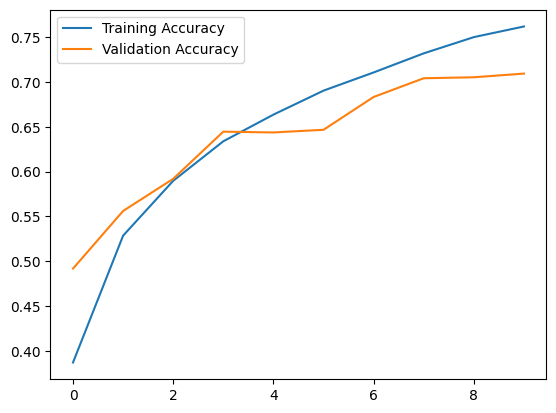

In [36]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()